Importing Libraries

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
import phik
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

#### 1.Target Encoding categorical features

Reading train and test csv files

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
y = train['y']

In [4]:
##Categorical columns
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O':
        cat_columns.append(i)

In [6]:
##Categorical train data
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
# cat_columns.remove('y')
cat_test = test[cat_columns]

##Target encoding categorical features
for i in cat_columns:
    en = TargetEncoder()
    en.fit(train[i],train['y'])
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])

In [7]:
##Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]
# binary_train = pd.concat((train['y'],binary_train),axis=1)

In [128]:
# X1_train = cat_train.drop('y',axis=1)
# X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

Corelation matrix of the train data using phik

In [9]:
corelation_mat = train.phik_matrix()

interval columns not set, guessing: ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 

Parameters for Xgboost

In [ ]:
params1={}
params1['eta']=[0.1,0.08,0.06,0.04,0.02]
params1['n_estimators']=[500,750,1000,1500]
params1['max_depth']=[2,4,6,8]
params1['objective'] = ['reg:linear']

1.1 Using top 100 features

In [119]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

selecting top 100 features

In [28]:
top_100_features = corelation_mat['y'].sort_values(ascending=False)[0:101]
top_100_features=top_100_features.drop('y')
X1_train = X1_train[top_100_features.index]
X1_test = X1_test[top_100_features.index]

Defining the model

In [29]:
clf = xgb.XGBRegressor(objective='reg:linear')

using grid search to get best parameters

In [30]:
grid2 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid2.fit(X1_train[top_100_features.index],y)

[10:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

Best score using 100 parameters

In [32]:
grid2.best_score_

0.5708277595698164

Saving the model

In [52]:
joblib.dump(grid2.best_estimator_,'Te_100feat.pkl')

['Te_100feat.pkl']

In [33]:
grid2.best_params_

{'eta': 0.02, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:linear'}

Training on Best model

In [34]:
best2 = grid2.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_100Feat.csv',index=False)

Kaggle Submission

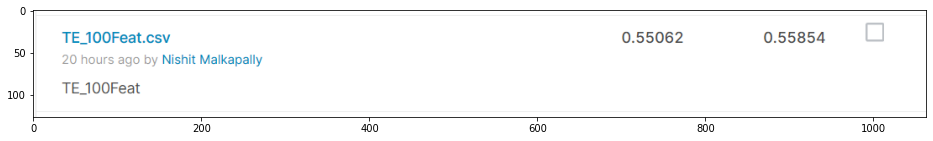

In [9]:
plt.figure(figsize=(16,4))
x=plt.imread('top_100.PNG')
plt.imshow(x)


- Using top 100 features without removing outliers and using target encoded features model has a r2 score of 0.55062

1.2.2 Considering 100 features with Y values less than 200

In [120]:
X2_train = X1_train.iloc[train[train['y']<200].index]
y2 = y[train[train['y']<200].index]

In [97]:
top_100_features = corelation_mat['y'].sort_values(ascending=False)[0:101]
top_100_features=top_100_features.drop('y')
X2_train = X2_train[top_100_features.index]
X1_test = X1_test[top_100_features.index]

Grid search on parameters

In [98]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid2 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid2.fit(X2_train[top_100_features.index],y2)

[11:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

Best score 

In [99]:
grid2.best_score_

0.597378231713515

- by removing outliers we got a better r2 score than the above model 

In [101]:
best2 = grid2.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_100Feat_wo_out.csv',index=False)

Kaggle Submission

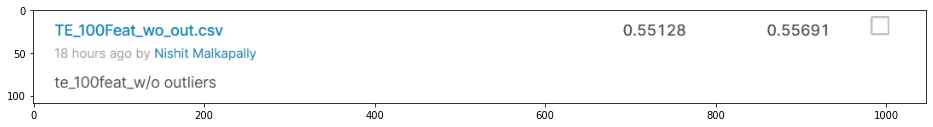

In [10]:
plt.figure(figsize=(16,4))
x=plt.imread('top_100_wo_outlier.PNG')
plt.imshow(x)


- With top 100 features and with target encoding and considering y values less than 200 models r2 score of 0.55128

Saving the model

In [102]:
joblib.dump(grid2.best_estimator_,'Te_100feat_wo_out.pkl')

['Te_100feat_wo_out.pkl']

1.2.3 Using top 100 features with Y values less than 175

In [109]:
X3_train = X1_train.iloc[train[train['y']<168].index]
y3 = y[train[train['y']<168].index]

In [110]:
top_100_features = corelation_mat['y'].sort_values(ascending=False)[0:101]
top_100_features=top_100_features.drop('y')
X3_train = X3_train[top_100_features.index]
X1_test = X1_test[top_100_features.index]

In [111]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid2 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid2.fit(X3_train[top_100_features.index],y3)

[12:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [112]:
grid2.best_score_

0.5989635526323507

Training on best model

In [113]:
best2 = grid2.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_100Feat_168.csv',index=False)

Kaggle Submission

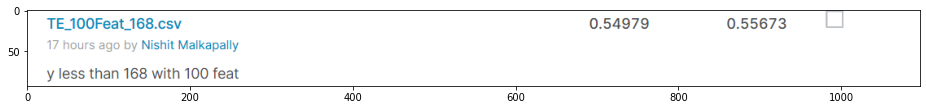

In [11]:
plt.figure(figsize=(16,4))
x=plt.imread('top_100_168.PNG')
plt.imshow(x)

- Using top 100 features with y values less than 168 models r2 score of 0.54979 

1.3 Using top 125 features using target encoding features with outliers

In [38]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [39]:
top_125_features = corelation_mat['y'].sort_values(ascending=False)[0:126]
top_125_features=top_125_features.drop('y')
X1_train = X1_train[top_125_features.index]
X1_test = X1_test[top_125_features.index]

In [40]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_125_features.index],y)

[10:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [41]:
grid3.best_score_

0.5705562930893706

Training on best model

In [42]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_125Feat.csv',index=False)

Kaggle Submission

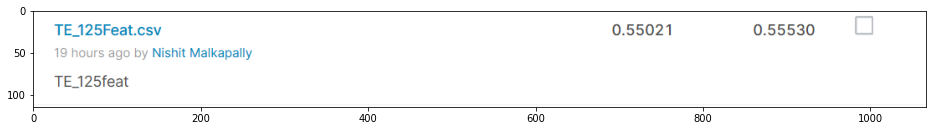

In [13]:
plt.figure(figsize=(16,4))
x=plt.imread('top_125.PNG')
plt.imshow(x)

- Using top 125 features and with outlier models r2 score is 0.55021

1.3.2 Using top 125 features without outlier

In [121]:
top_125_features = corelation_mat['y'].sort_values(ascending=False)[0:126]
top_125_features=top_125_features.drop('y')
X2_train = X2_train[top_125_features.index]
X1_test = X1_test[top_125_features.index]

In [122]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X2_train[top_125_features.index],y2)

[12:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [123]:
grid3.best_score_

0.5967374751285488

In [124]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_125Feat_lt200.csv',index=False)

Kaggle Submission

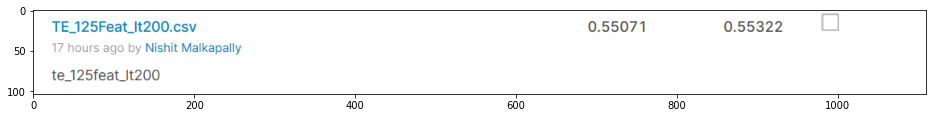

In [15]:
plt.figure(figsize=(16,4))
x=plt.imread('top_125_wo_outlier.PNG')
plt.imshow(x)

- Using top 125 features and removing the y values > 200 model r2 score is 0.55071

1.4 Using Top 150 features with outlier

In [43]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [44]:
top_150_features = corelation_mat['y'].sort_values(ascending=False)[0:151]
top_150_features=top_150_features.drop('y')
X1_train = X1_train[top_150_features.index]
X1_test = X1_test[top_150_features.index]

In [45]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_150_features.index],y)

[10:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [46]:
grid3.best_score_

0.5708519504444112

In [47]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_150Feat.csv',index=False)

Kaggle Submission

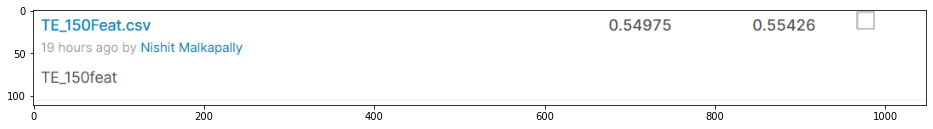

In [17]:
plt.figure(figsize=(16,4))
x=plt.imread('te_150.PNG')
plt.imshow(x)

- Using target encoding with 150 features model r2 score is 0.54975 
- as the features increase the  performance is slightly decreasing

1.4.1 Using top 150 features with y values less than 200

In [140]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [141]:
X2_train = X1_train.iloc[train[train['y']<200].index]
y2 = y[train[train['y']<200].index]

In [130]:
top_150_features = corelation_mat['y'].sort_values(ascending=False)[0:151]
top_150_features=top_150_features.drop('y')
X2_train = X2_train[top_150_features.index]
X1_test = X1_test[top_150_features.index]

In [133]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X2_train[top_150_features.index],y2)

[13:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [134]:
grid3.best_score_

0.5972699035484966

In [135]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_150Feat_wo_out.csv',index=False)

Kaggle Submission

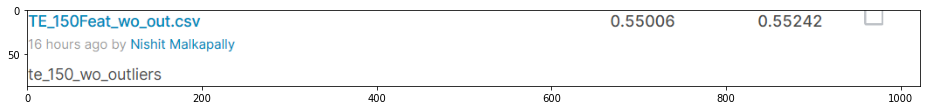

In [19]:
plt.figure(figsize=(16,4))
x=plt.imread('TE_150Feat_wo_out.PNG')
plt.imshow(x)

- With values less than 200 model r2 score is 0.55006

1.5 Using top 175 features 

In [53]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [54]:
top_features = corelation_mat['y'].sort_values(ascending=False)[0:176]
top_features=top_features.drop('y')
X1_train = X1_train[top_features.index]
X1_test = X1_test[top_features.index]

In [55]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_features.index],y)

[10:32:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [56]:
grid3.best_score_

0.569970500417364

In [57]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_175Feat.csv',index=False)

- R2 score is less compared to above models so didn't sumbit to submissions

Using top 175 features with y values less than 200

In [142]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [143]:
X2_train = X1_train.iloc[train[train['y']<200].index]
y2 = y[train[train['y']<200].index]

In [144]:
top_features = corelation_mat['y'].sort_values(ascending=False)[0:176]
top_features=top_features.drop('y')
X2_train = X2_train[top_features.index]
X1_test = X1_test[top_features.index]

In [145]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_features.index],y)

[13:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [146]:
grid3.best_score_

0.569970500417364

- R2 score is less compared to above models so didn't sumbit to submissions

1.6 Using top 200 features

In [61]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [62]:
top_features = corelation_mat['y'].sort_values(ascending=False)[0:201]
top_features=top_features.drop('y')
X1_train = X1_train[top_features.index]
X1_test = X1_test[top_features.index]

In [63]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_features.index],y)

[10:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [64]:
grid3.best_score_

0.5694551532280204

In [65]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_200Feat.csv',index=False)

- R2 score is less compared to above models so didn't sumbit to submissions

1.7 Considering Top 250 features

In [74]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [75]:
top_features = corelation_mat['y'].sort_values(ascending=False)[0:251]
top_features=top_features.drop('y')
X1_train = X1_train[top_features.index]
X1_test = X1_test[top_features.index]

In [68]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_features.index],y)

[10:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:50:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [72]:
grid3.best_score_

0.5692503070652226

In [76]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_250Feat.csv',index=False)

Kaggle Submission

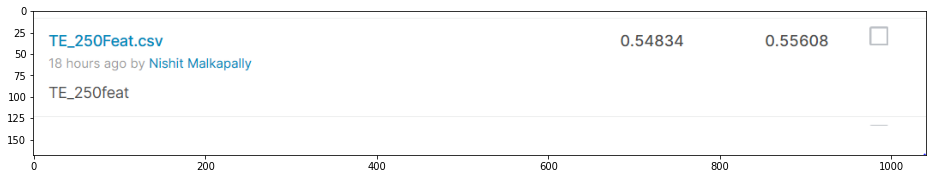

In [21]:
plt.figure(figsize=(16,4))
x=plt.imread('te_250.PNG')
plt.imshow(x)

- using 250 top features models r2 score is 0.54834

1.8 Considering Top 300 features

In [77]:
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [78]:
top_features = corelation_mat['y'].sort_values(ascending=False)[0:301]
top_features=top_features.drop('y')
X1_train = X1_train[top_features.index]
X1_test = X1_test[top_features.index]

In [79]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_features.index],y)

[11:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:28:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [80]:
grid3.best_score_

0.5693306242924507

In [81]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('TE_300Feat.csv',index=False)

In [ ]:
plt.figure(figsize=(16,4))
x=plt.imread('TE_150Feat_wo_out.PNG')
plt.imshow(x)

Kaggle Submission

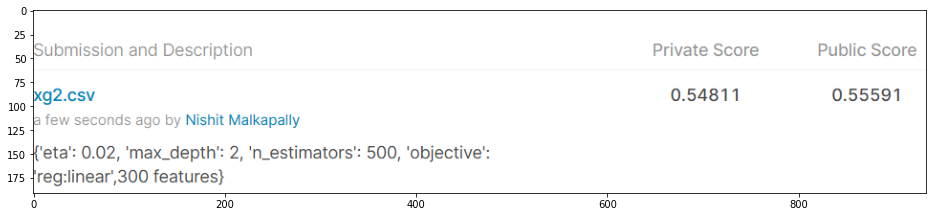

In [23]:
plt.figure(figsize=(16,4))
x=plt.imread('TE-300_feat.PNG')
plt.imshow(x)

- using 300 features model r2 score is 0.54811

#### 2.Label Encoding to encode categorical features

reading csv files

In [147]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [148]:
y = train['y']

In [149]:
##Categorical columns
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

Label encoding features

In [150]:
##Categorical train data
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

##Label encoding categorical features
for i in cat_columns:
    en = LabelEncoder()
    en.fit(list(train[i].values)+list(test[i].values))
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])

Binary data

In [151]:
##Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]
binary_train = pd.concat((train['y'],binary_train),axis=1)

In [283]:
X1_train = cat_train.drop('y',axis=1)
X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

Training on top 275 features

In [153]:
X1_train = X1_train[top_275_features.index]
X1_test = X1_test[top_275_features.index]

In [162]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train[top_275_features.index],y)

[14:50:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [163]:
grid3.best_score_

0.5591298913783412

In [165]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('LE_275Feat.csv',index=False)

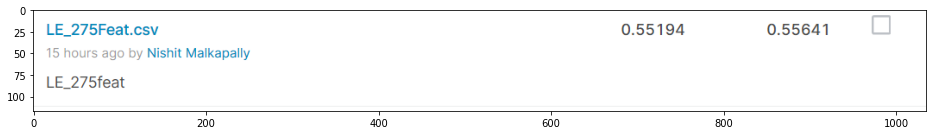

In [24]:
plt.figure(figsize=(16,4))
x=plt.imread('le_275.PNG')
plt.imshow(x)

- using label encoding and top 275 features model has r2 score of 0.55194

Training on top 250 features 

In [277]:
X1_train = cat_train.drop('y',axis=1)
X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [179]:
top_100_features = corelation_mat['y'].sort_values(ascending=False)[0:250]
top_100_features=top_100_features.drop('y')
X1_train = X1_train[top_100_features.index]
X1_test = X1_test[top_100_features.index]

In [180]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X1_train,y)

[15:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [181]:
grid3.best_score_

0.5592639263665716

In [182]:
grid3.best_params_

{'eta': 0.02, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:linear'}

In [183]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('LE_250Feat.csv',index=False)

In [184]:
joblib.dump(best2,'le_250feat.pkl')

['le_250feat.pkl']

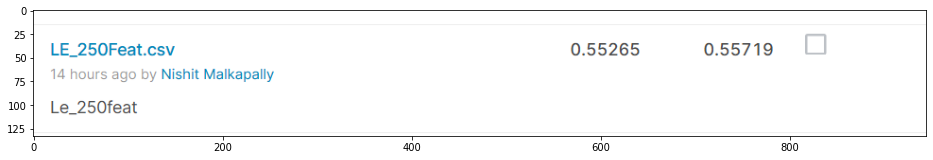

In [26]:
plt.figure(figsize=(16,4))
x=plt.imread('le_250.PNG')
plt.imshow(x)

Using 250 features with label encoder models r2 score is 0.55265

250 features with y values less than 200

In [187]:
X2_train = X1_train.iloc[train[train['y']<200].index]
y2 = y[train[train['y']<200].index]

In [188]:
top_250_features = corelation_mat['y'].sort_values(ascending=False)[0:250]
top_250_features=top_250_features.drop('y')
X2_train = X2_train[top_250_features.index]
X1_test = X1_test[top_250_features.index]

In [189]:
clf = xgb.XGBRegressor(objective='reg:linear')
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X2_train,y2)

[15:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [192]:
grid3.best_score_

0.5847985314233584

In [193]:
grid3.best_params_

{'eta': 0.02, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:linear'}

In [191]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('LE_250Feat_wo_outlier.csv',index=False)

In [196]:
joblib.dump(best2,'pr_55294.pkl')

['pr_55294.pkl']

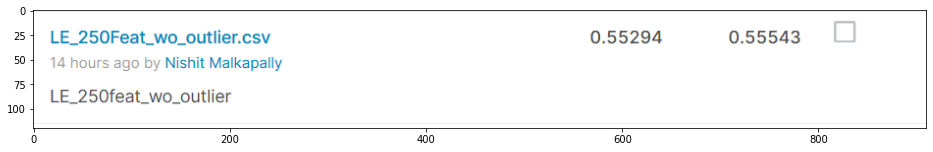

In [27]:
plt.figure(figsize=(16,4))
x=plt.imread('le_250_wo_out.PNG')
plt.imshow(x)

- with 250 features and y values less than 200 models r2 score is 0.55294

Using 260 features with y values less than 175

In [246]:
X2_train = X1_train.iloc[train[train['y']<175].index]
y2 = y[train[train['y']<175].index]

In [247]:
top_250_features = corelation_mat['y'].sort_values(ascending=False)[0:260]
top_250_features=top_250_features.drop('y')
X2_train = X2_train[top_250_features.index]
X1_test = X1_test[top_250_features.index]

In [248]:
params1={}
params1['eta']=[0.06,0.04,0.02]
params1['n_estimators']=[250,500,750,1000]
params1['max_depth']=[2,4,6,8]
params1['objective'] = ['reg:linear']
params1['reg_lambda']=[0,1,2]

In [249]:
clf = xgb.XGBRegressor(objective='reg:linear',)
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X2_train,y2)

[17:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
         

In [250]:
grid3.best_score_

0.5855739019983974

In [231]:
grid3.best_params_

{'eta': 0.02,
 'max_depth': 2,
 'n_estimators': 250,
 'objective': 'reg:linear',
 'reg_lambda': 1}

In [251]:
best2 = grid3.best_estimator_
pred = best2.predict(X1_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('LE_260Feat_wo_outlier_175.csv',index=False)

In [252]:
joblib.dump(best2,'pr_55341.pkl')

['pr_55341.pkl']

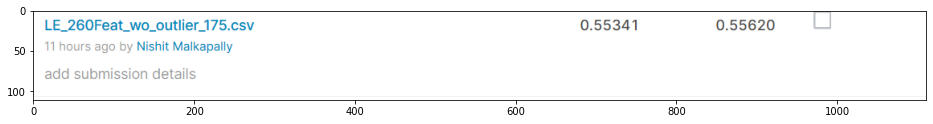

In [29]:
plt.figure(figsize=(16,4))
x=plt.imread('le_260_175.PNG')
plt.imshow(x)

- Using 260 label encoded features and y values less than 175 models r2 score is 0.55341 which is best so far

Using 250 features with y valeus less than 150

In [293]:
X2_train = X1_train.iloc[train[train['y']<150].index]
y2 = y[train[train['y']<150].index]

In [294]:
top_250_features = corelation_mat['y'].sort_values(ascending=False)[0:250]
top_250_features=top_250_features.drop('y')
X2_train = X2_train[top_250_features.index]
X2_test = X1_test[top_250_features.index]

In [295]:
clf = xgb.XGBRegressor(objective='reg:linear',)
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1)
grid3.fit(X2_train,y2)

[19:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
         

In [296]:
grid3.best_score_

0.5855002400280059

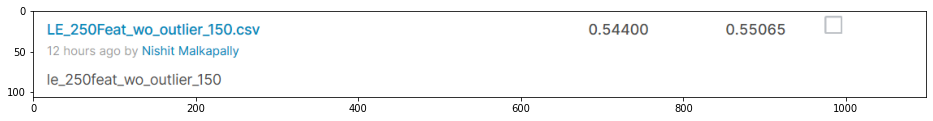

In [30]:
plt.figure(figsize=(16,4))
x=plt.imread('le_250_150.PNG')
plt.imshow(x)

- by reducing the target values with less than 150 model's performace is reduced so its better to consider upto 175
- Considering less features models preformance is bad for label encoded data

In [31]:
from prettytable import PrettyTable

Pretty Table

In [60]:
x = PrettyTable()
x.field_names=['S.no','Encoder','Features used','Y value_less_than','Score','Position in LB']
x.add_row(['1','Target Encoding','100','full data','0.5506','950'])
x.add_row(['2','Target Encoding','100','y < 200','0.5512','750'])
x.add_row(['3','Target Encoding','100','y  < 168','0.5497','-'])
x.add_row(['4','Target Encoding','125','full data','0.5502','-'])
x.add_row(['5','Target Encoding','125','y < 200','0.5507','-'])
x.add_row(['6','Target Encoding','150','full data','0.5497','-'])
x.add_row(['7','Target Encoding','150','y < 200','0.5500','-'])
x.add_row(['8','Target Encoding','250','full data','0.5483','-'])
x.add_row(['9','Target Encoding','300','full data','0.5481','-'])
x.add_row(['10','Label Encoding','275','full data','0.5519','350'])
x.add_row(['11','Label Encoding','250','full data','0.5526','98'])
x.add_row(['12','Label Encoding','250','y < 200','0.5529','65'])
x.add_row(['13','Label Encoding','260','y < 175','0.5534','34'])
x.add_row(['14','Label Encoding','250','y < 150','0.5440','-'])

In [61]:
print(x)

+------+-----------------+---------------+-------------------+--------+----------------+
| S.no |     Encoder     | Features used | Y value_less_than | Score  | Position in LB |
+------+-----------------+---------------+-------------------+--------+----------------+
|  1   | Target Encoding |      100      |     full data     | 0.5506 |      950       |
|  2   | Target Encoding |      100      |      y < 200      | 0.5512 |      750       |
|  3   | Target Encoding |      100      |      y  < 168     | 0.5497 |       -        |
|  4   | Target Encoding |      125      |     full data     | 0.5502 |       -        |
|  5   | Target Encoding |      125      |      y < 200      | 0.5507 |       -        |
|  6   | Target Encoding |      150      |     full data     | 0.5497 |       -        |
|  7   | Target Encoding |      150      |      y < 200      | 0.5500 |       -        |
|  8   | Target Encoding |      250      |     full data     | 0.5483 |       -        |
|  9   | Target Encod

#### Summary

- Used two types of encoding techniques for categorical features
    - Target encoding
    - Label Encoding
- Calculated corelation matrix for the train data using phik
- There are no specific names for the features so its a bit hard to do feature engineering
- Used top corelated features with respect to target label as hyperparameter
- Trained the models with outliers and without outliers and verified the performances
- Target encoded features with 100 features models are performing better than considering more features 
- Label encoded features with top features between 250 to 270 performs best on data 
- Best model is obtained by Label encoding with 260 features and considering the target variable less than 175 has r2 score of 0.55341 which gives a leader board position of 34 (top 1%).